In [1]:
import keras
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imread, imresize
import os
import random

Using TensorFlow backend.


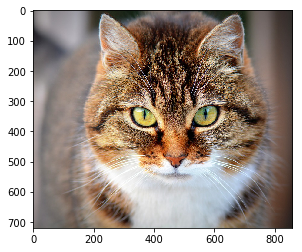

In [2]:
mean_pixel = [103.939, 116.779, 123.68]
mean_pixel = np.array(mean_pixel)

cat = imread('cat.jpg')
plt.imshow(cat)
plt.show()

In [3]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False, input_shape=cat.shape)
new_model = model

In [4]:
cat = cat - mean_pixel
out = model.predict(cat[np.newaxis])
out.shape

(1, 22, 26, 512)

In [11]:
test_base = 'data/paris/'
image_name_test = []
for root, subfolders, files in os.walk(test_base):
    for file in files:
        if file.endswith('.jpg'):
            image_name_test.append(os.path.join(root, file))

In [12]:
image_num = len(image_name_test)

In [13]:
D = 512
out = np.zeros((image_num, D))
models = {}
models_num = 0
models_num_max = 100

for i,file in enumerate(image_name_test):
    try:
        image = imread(file)
        image = image - mean_pixel

        # because deleting the python objection did not delete the model in GPU memory,
        # we should clear the GPU memory use K.clear_session
        if image.shape not in models.keys():
            model = VGG16(weights='imagenet', include_top=False, input_shape=image.shape)
            if models_num <= models_num_max:
                models[image.shape] = model
                models_num += 1
        else:
            print 'get model with {}'.format(image.shape)
            model = models[image.shape]

        print 'image shape is {}'.format(image.shape)
        out[i] = model.predict(image[np.newaxis,:]).sum(axis=(1,2))
        if i % 10 == 0:
            print 'process {}%'.format(float(i) / image_num * 100)

        if models_num == models_num_max + 1:
            K.clear_session()
            models = {}
    # some images are broken
    except Exception as e:
        print e
    
    if False:
        break

image shape is (1024, 768, 3)
process 0.0%
image shape is (321, 1024, 3)
image shape is (696, 1024, 3)
get model with (1024, 768, 3)
image shape is (1024, 768, 3)
image shape is (768, 1024, 3)
get model with (768, 1024, 3)
image shape is (768, 1024, 3)
image shape is (813, 1024, 3)
image shape is (820, 1024, 3)
get model with (768, 1024, 3)
image shape is (768, 1024, 3)
image shape is (1024, 658, 3)
get model with (1024, 768, 3)
image shape is (1024, 768, 3)
process 0.155957579538%
get model with (768, 1024, 3)
image shape is (768, 1024, 3)
get model with (768, 1024, 3)
image shape is (768, 1024, 3)
get model with (768, 1024, 3)
image shape is (768, 1024, 3)
image shape is (732, 1024, 3)
get model with (768, 1024, 3)
image shape is (768, 1024, 3)
get model with (1024, 768, 3)
image shape is (1024, 768, 3)
image shape is (1024, 769, 3)
get model with (1024, 768, 3)
image shape is (1024, 768, 3)
image shape is (634, 1024, 3)
image shape is (771, 1024, 3)
process 0.311915159077%
get model

In [15]:
out.shape

(6412, 512)

In [16]:
out[-1]

array([  8.85875092e+01,   2.08653519e+02,   1.16574316e+03,
         1.00800873e+02,   3.45558563e+02,   7.51463394e+01,
         1.91481979e+02,   9.80883484e+02,   2.35383270e+02,
         4.30274048e+01,   8.22863083e+01,   1.60042435e+02,
         9.78967651e+02,   0.00000000e+00,   1.17536369e+02,
         4.83709290e+02,   1.22483086e+02,   6.30316956e+02,
         1.42021896e+02,   2.54765961e+02,   3.05513367e+02,
         7.21639465e+02,   1.18969101e+02,   1.13655312e+02,
         4.93994675e+01,   3.37783081e+02,   9.68179932e+01,
         3.30437012e+02,   1.13755920e+03,   2.68843117e+01,
         5.83442139e+02,   3.89730408e+02,   7.23860779e+02,
         3.45509369e+02,   6.05986084e+02,   1.44250839e+02,
         1.39013672e+02,   3.29861969e+02,   8.26657295e+00,
         0.00000000e+00,   1.41920422e+03,   2.09778030e+02,
         1.92339258e+03,   3.91633148e+02,   9.82028076e+02,
         1.07583118e+03,   5.12390015e+02,   6.68685059e+02,
         1.80897293e+01,

In [17]:
out2 = out[~np.all(out == 0, axis=1)]

In [18]:
out2.shape

(6392, 512)

In [19]:
np.save('paris_keras',out2)